In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import sys
import time
from scipy import stats
import matplotlib.gridspec as gridspec

if 'path' in locals(): os.chdir(path)
else: os.chdir("../"); path = os.getcwd()
print("The path is:", path)
path_manustript = path + "/Manuscript_Results/"
path_Figure_E = path_manustript + "Figure_E/"
from pyMFI import MFI
from pyMFI import MFI1D
from pyMFI import run_plumed

from matplotlib import rc
plt.rcParams.update({ "text.usetex": True, "font.size": 22, "font.family": "serif", "font.serif": ["computer modern roman"]})
plt.rcParams.update({"font.size": 22})
plw = 0.6
pcs = 3
pms = 3
bfillc = [0.9,0.9,0.9]
plt.rcParams['axes.linewidth'] = plw
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = plw
plt.rcParams['xtick.minor.width'] = plw
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.major.size'] = 4.5
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.major.width'] = plw
plt.rcParams['ytick.minor.width'] = plw
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.major.size'] = 5
plt.rcParams["figure.figsize"] = (5,4)

times = r"$\times$"
pwr_neg = r"$^{-1}$"


The path is: /home/ucecabj/Desktop/MFI_git


#### Subplot 1

In [3]:
[time_history_1, ofe_history_1, aad_history_1 ,volume_history_1] = MFI.load_pkl(path_Figure_E + "data_figure_E_1A.pkl")

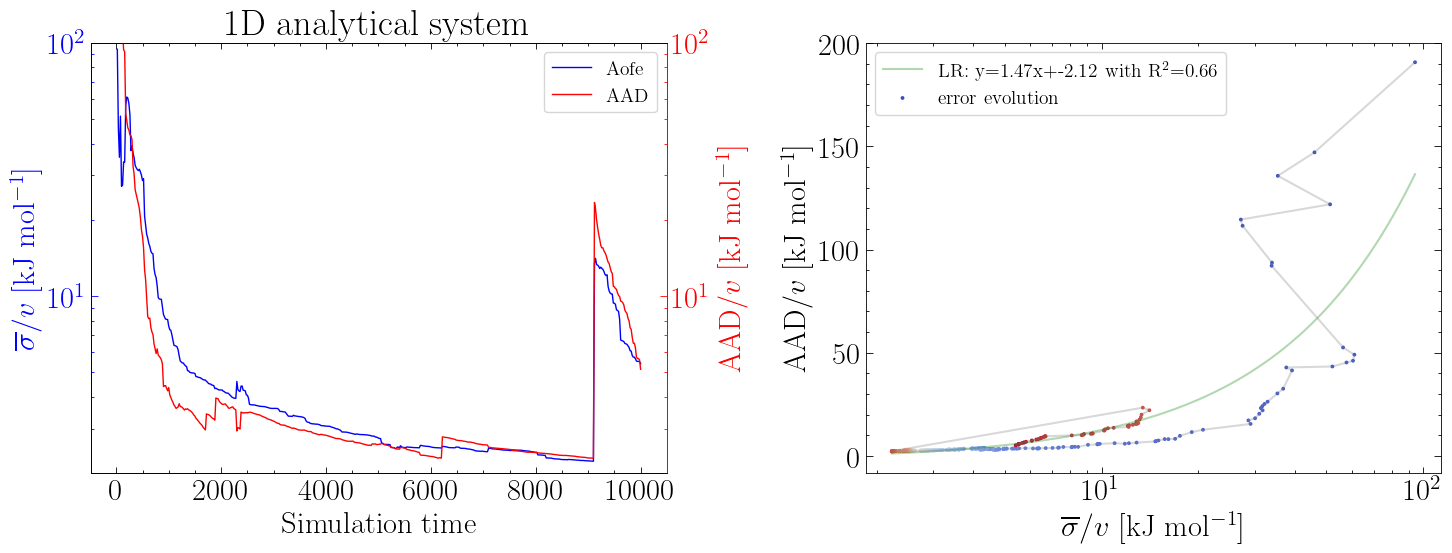

In [16]:
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True

fig, (ax1, ax3) = plt.subplots(1,2,figsize=(15,6))
ax2 = ax1.twinx()

ax1.plot( time_history_1, np.asarray(ofe_history_1) / np.asarray(volume_history_1) ,color='blue',linewidth=1,label="Aofe")
ax2.plot( time_history_1, np.asarray(aad_history_1) / np.asarray(volume_history_1) ,color='red',linewidth=1,label="AAD")
ax1.set_xlabel("Simulation time"); ax1.set_ylabel("$\overline{\sigma}/v$ [kJ mol$^{-1}$]", c="blue"); ax2.set_ylabel("AAD/$v$ [kJ mol$^{-1}$]", c="red")#ax1.set_title("error/volume vs time"); 
ax1.set_ylim(0,30)
ax2.set_ylim(0,30)
handles1, labels1 = ax1.get_legend_handles_labels() ; handles2, labels2 = ax2.get_legend_handles_labels(); ax1.legend(handles1 + handles2, labels1 + labels2, fontsize=14)
# plt.show()
ax1.tick_params(axis='y', which='both', colors='blue')
ax1.spines['right'].set_color('blue')        # setting up Y-axis tick color to red
ax2.tick_params(axis='y', which='both', colors='red')
ax2.spines['right'].set_color('red')        # setting up Y-axis tick color to red

##############################################################################################################
from scipy import stats
slope, intercept, r, p, se = stats.linregress(np.asarray(ofe_history_1) / np.asarray(volume_history_1), np.asarray(aad_history_1) / np.asarray(volume_history_1))
x_line = np.linspace(min(np.asarray(ofe_history_1) / np.asarray(volume_history_1)), max(np.asarray(ofe_history_1) / np.asarray(volume_history_1)), 200)

cmap = plt.cm.get_cmap('coolwarm')
norm = plt.Normalize(0, len(ofe_history_1))
# plt.figure(figsize=(15,5))

# plt.subplot(1,3,3)
ax3.plot(x_line, x_line*slope + intercept, c="green", alpha=0.3, label="LR: y=" + str(round(slope,2)) + "x+" + str(round(intercept,2)) + " with R$^2$=" + str(round(r**2,2)))

ax3.scatter(np.asarray(ofe_history_1) / np.asarray(volume_history_1), np.asarray(aad_history_1) / np.asarray(volume_history_1) ,s=3, c=range(len(ofe_history_1)), cmap=cmap, norm=norm, label="error evolution")
ax3.plot(np.asarray(ofe_history_1) / np.asarray(volume_history_1), np.asarray(aad_history_1) / np.asarray(volume_history_1) , c="grey", alpha=0.3); 
ax3.set_xlabel("$\overline{\sigma}/v$ [kJ mol$^{-1}$]"); ax3.set_ylabel("AAD/$v$ [kJ mol$^{-1}$]"); ax3.set_xscale("log")#; plt.yscale("log");ax3.set_title("aad/v vs. ofe/v"); 
ax3.legend(fontsize=14)
# handles1, labels1 = ax1.get_legend_handles_labels() ; handles2, labels2 = ax2.get_legend_handles_labels(); ax1.legend(handles1 + handles2, labels1 + labels2, fontsize=14)

plt.tight_layout()
plt.show()

plt.rcParams['xtick.minor.visible'] = False
plt.rcParams['ytick.minor.visible'] = False

#### Subplot 2

In [4]:
[time_history_2, ofe_history_2, aad_history_2 ,volume_history_2] = MFI.load_pkl(path_Figure_E + "data_figure_E_1B.pkl")

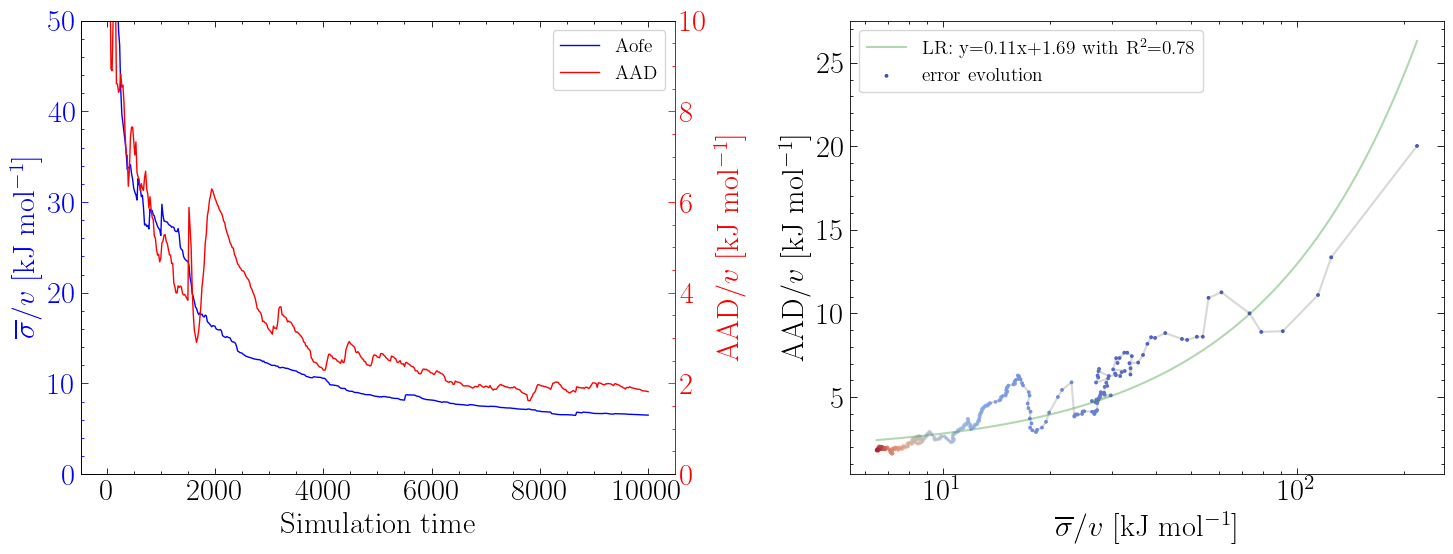

In [5]:
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True

fig, (ax1, ax3) = plt.subplots(1,2,figsize=(15,6))
ax2 = ax1.twinx()

ax1.plot( time_history_2, np.asarray(ofe_history_2) / np.asarray(volume_history_2) ,color='blue',linewidth=1,label="Aofe")
ax2.plot( time_history_2, np.asarray(aad_history_2)[:,1] / np.asarray(volume_history_2) ,color='red',linewidth=1,label="AAD")
ax1.set_xlabel("Simulation time"); ax1.set_ylabel("$\overline{\sigma}/v$ [kJ mol$^{-1}$]", c="blue"); ax2.set_ylabel("AAD/$v$ [kJ mol$^{-1}$]", c="red")#ax1.set_title("error/volume vs time"); 
ax1.set_ylim(0,50)
ax2.set_ylim(0,10)
handles1, labels1 = ax1.get_legend_handles_labels() ; handles2, labels2 = ax2.get_legend_handles_labels(); ax1.legend(handles1 + handles2, labels1 + labels2, fontsize=14)
# plt.show()
ax1.tick_params(axis='y', which='both', colors='blue')
ax1.spines['right'].set_color('blue')        # setting up Y-axis tick color to red
ax2.tick_params(axis='y', which='both', colors='red')
ax2.spines['right'].set_color('red')        # setting up Y-axis tick color to red

##############################################################################################################
slope, intercept, r, p, se = stats.linregress(np.asarray(ofe_history_2) / np.asarray(volume_history_2), np.asarray(aad_history_2)[:,1] / np.asarray(volume_history_2))
x_line = np.linspace(min(np.asarray(ofe_history_2) / np.asarray(volume_history_2)), max(np.asarray(ofe_history_2) / np.asarray(volume_history_2)), 200)

cmap = plt.cm.get_cmap('coolwarm')
norm = plt.Normalize(0, len(ofe_history_2))
# plt.figure(figsize=(15,5))

# plt.subplot(1,3,3)
ax3.plot(x_line, x_line*slope + intercept, c="green", alpha=0.3, label="LR: y=" + str(round(slope,2)) + "x+" + str(round(intercept,2)) + " with R$^2$=" + str(round(r**2,2)))

ax3.scatter(np.asarray(ofe_history_2) / np.asarray(volume_history_2), np.asarray(aad_history_2)[:,1] / np.asarray(volume_history_2) ,s=3, c=range(len(ofe_history_2)), cmap=cmap, norm=norm, label="error evolution")
ax3.plot(np.asarray(ofe_history_2) / np.asarray(volume_history_2), np.asarray(aad_history_2)[:,1] / np.asarray(volume_history_2) , c="grey", alpha=0.3); 
ax3.set_xlabel("$\overline{\sigma}/v$ [kJ mol$^{-1}$]"); ax3.set_ylabel("AAD/$v$ [kJ mol$^{-1}$]"); ax3.set_xscale("log")#; plt.yscale("log");ax3.set_title("aad/v vs. ofe/v"); 
ax3.legend(fontsize=14)
# handles1, labels1 = ax1.get_legend_handles_labels() ; handles2, labels2 = ax2.get_legend_handles_labels(); ax1.legend(handles1 + handles2, labels1 + labels2, fontsize=14)

plt.tight_layout()
plt.show()

plt.rcParams['xtick.minor.visible'] = False
plt.rcParams['ytick.minor.visible'] = False

#### Subplot 3

In [6]:
[time_history_31, ofe_history_31, aad_history_31 ,volume_history_31] = MFI.load_pkl(path_manustript +"Figure_E/" + "data_figure_E_2_1.pkl")
[time_history_32, ofe_history_32, aad_history_32 ,volume_history_32] = MFI.load_pkl(path_manustript +"Figure_E/" + "data_figure_E_2_2.pkl")
[time_history_33, ofe_history_33, aad_history_33 ,volume_history_33] = MFI.load_pkl(path_manustript +"Figure_E/" + "data_figure_E_2_3.pkl")


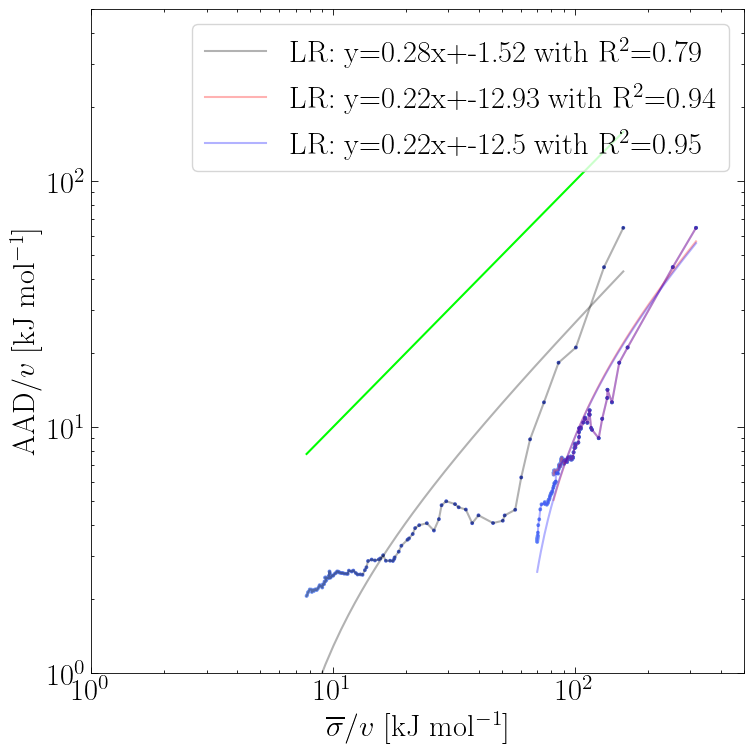

In [13]:
cmap = plt.cm.get_cmap('coolwarm')
norm = plt.Normalize(0, len(ofe_history_1))

slope_31, intercept_31, r_31, p_31, se_31 = stats.linregress(np.asarray(ofe_history_31) / np.asarray(volume_history_31), np.asarray(aad_history_31)[:,1] / np.asarray(volume_history_31))
slope_32, intercept_32, r_32, p_32, se_32 = stats.linregress(np.asarray(ofe_history_32) / np.asarray(volume_history_32), np.asarray(aad_history_32)[:,1] / np.asarray(volume_history_32))
slope_33, intercept_33, r_33, p_33, se_33 = stats.linregress(np.asarray(ofe_history_33) / np.asarray(volume_history_33), np.asarray(aad_history_33)[:,1] / np.asarray(volume_history_33))
x_line_31 = np.linspace(min(np.asarray(ofe_history_31) / np.asarray(volume_history_31)), max(np.asarray(ofe_history_31) / np.asarray(volume_history_31)), 200)
x_line_32 = np.linspace(min(np.asarray(ofe_history_32) / np.asarray(volume_history_32)), max(np.asarray(ofe_history_32) / np.asarray(volume_history_32)), 200)
x_line_33 = np.linspace(min(np.asarray(ofe_history_33) / np.asarray(volume_history_33)), max(np.asarray(ofe_history_33) / np.asarray(volume_history_33)), 200)


plt.figure(figsize=(8,8))
plt.scatter(np.asarray(ofe_history_31) / np.asarray(volume_history_31), np.asarray(aad_history_31)[:,1] / np.asarray(volume_history_31) ,s=3, c=range(len(ofe_history_31)), cmap=cmap, norm=norm)
plt.plot(np.asarray(ofe_history_31) / np.asarray(volume_history_31), np.asarray(aad_history_31)[:,1] / np.asarray(volume_history_31) , c="black", alpha=0.3); 
plt.plot(x_line_31, x_line_31*slope_31 + intercept_31, c="black", alpha=0.3, label="LR: y=" + str(round(slope_31,2)) + "x+" + str(round(intercept_31,2)) + " with R$^2$=" + str(round(r_31**2,2)))

plt.scatter(np.asarray(ofe_history_32)  / np.asarray(volume_history_32), np.asarray(aad_history_32)[:,1]  / np.asarray(volume_history_32) ,s=3, c=range(len(ofe_history_32)), cmap=cmap, norm=norm)
plt.plot(np.asarray(ofe_history_32)  / np.asarray(volume_history_32), np.asarray(aad_history_32)[:,1]  / np.asarray(volume_history_32), c="red", alpha=0.3);
plt.plot(x_line_32, x_line_32*slope_32 + intercept_32, c="red", alpha=0.3, label="LR: y=" + str(round(slope_32,2)) + "x+" + str(round(intercept_32,2)) + " with R$^2$=" + str(round(r_32**2,2)))

plt.scatter(np.asarray(ofe_history_33) / np.asarray(volume_history_33), np.asarray(aad_history_33)[:,1] / np.asarray(volume_history_33) ,s=3, c=range(len(ofe_history_33)), cmap=cmap, norm=norm)
plt.plot(np.asarray(ofe_history_33) / np.asarray(volume_history_33), np.asarray(aad_history_33)[:,1] / np.asarray(volume_history_33), c="blue", alpha=0.3); 
plt.plot(x_line_33, x_line_33*slope_33 + intercept_33, c="blue", alpha=0.3, label="LR: y=" + str(round(slope_33,2)) + "x+" + str(round(intercept_33,2)) + " with R$^2$=" + str(round(r_33**2,2)))

plt.plot(x_line_31, x_line_31, c="lime")

plt.xlabel("$\overline{\sigma}/v$ [kJ mol$^{-1}$]"); plt.ylabel("AAD/$v$ [kJ mol$^{-1}$]")#; plt.title("10 MetaD + 10 MetaD+US")
plt.ylim(1,500); plt.xlim(1,500)
plt.xscale("log"); plt.yscale("log")
plt.legend(); plt.tight_layout(); plt.show()

### Combine all together

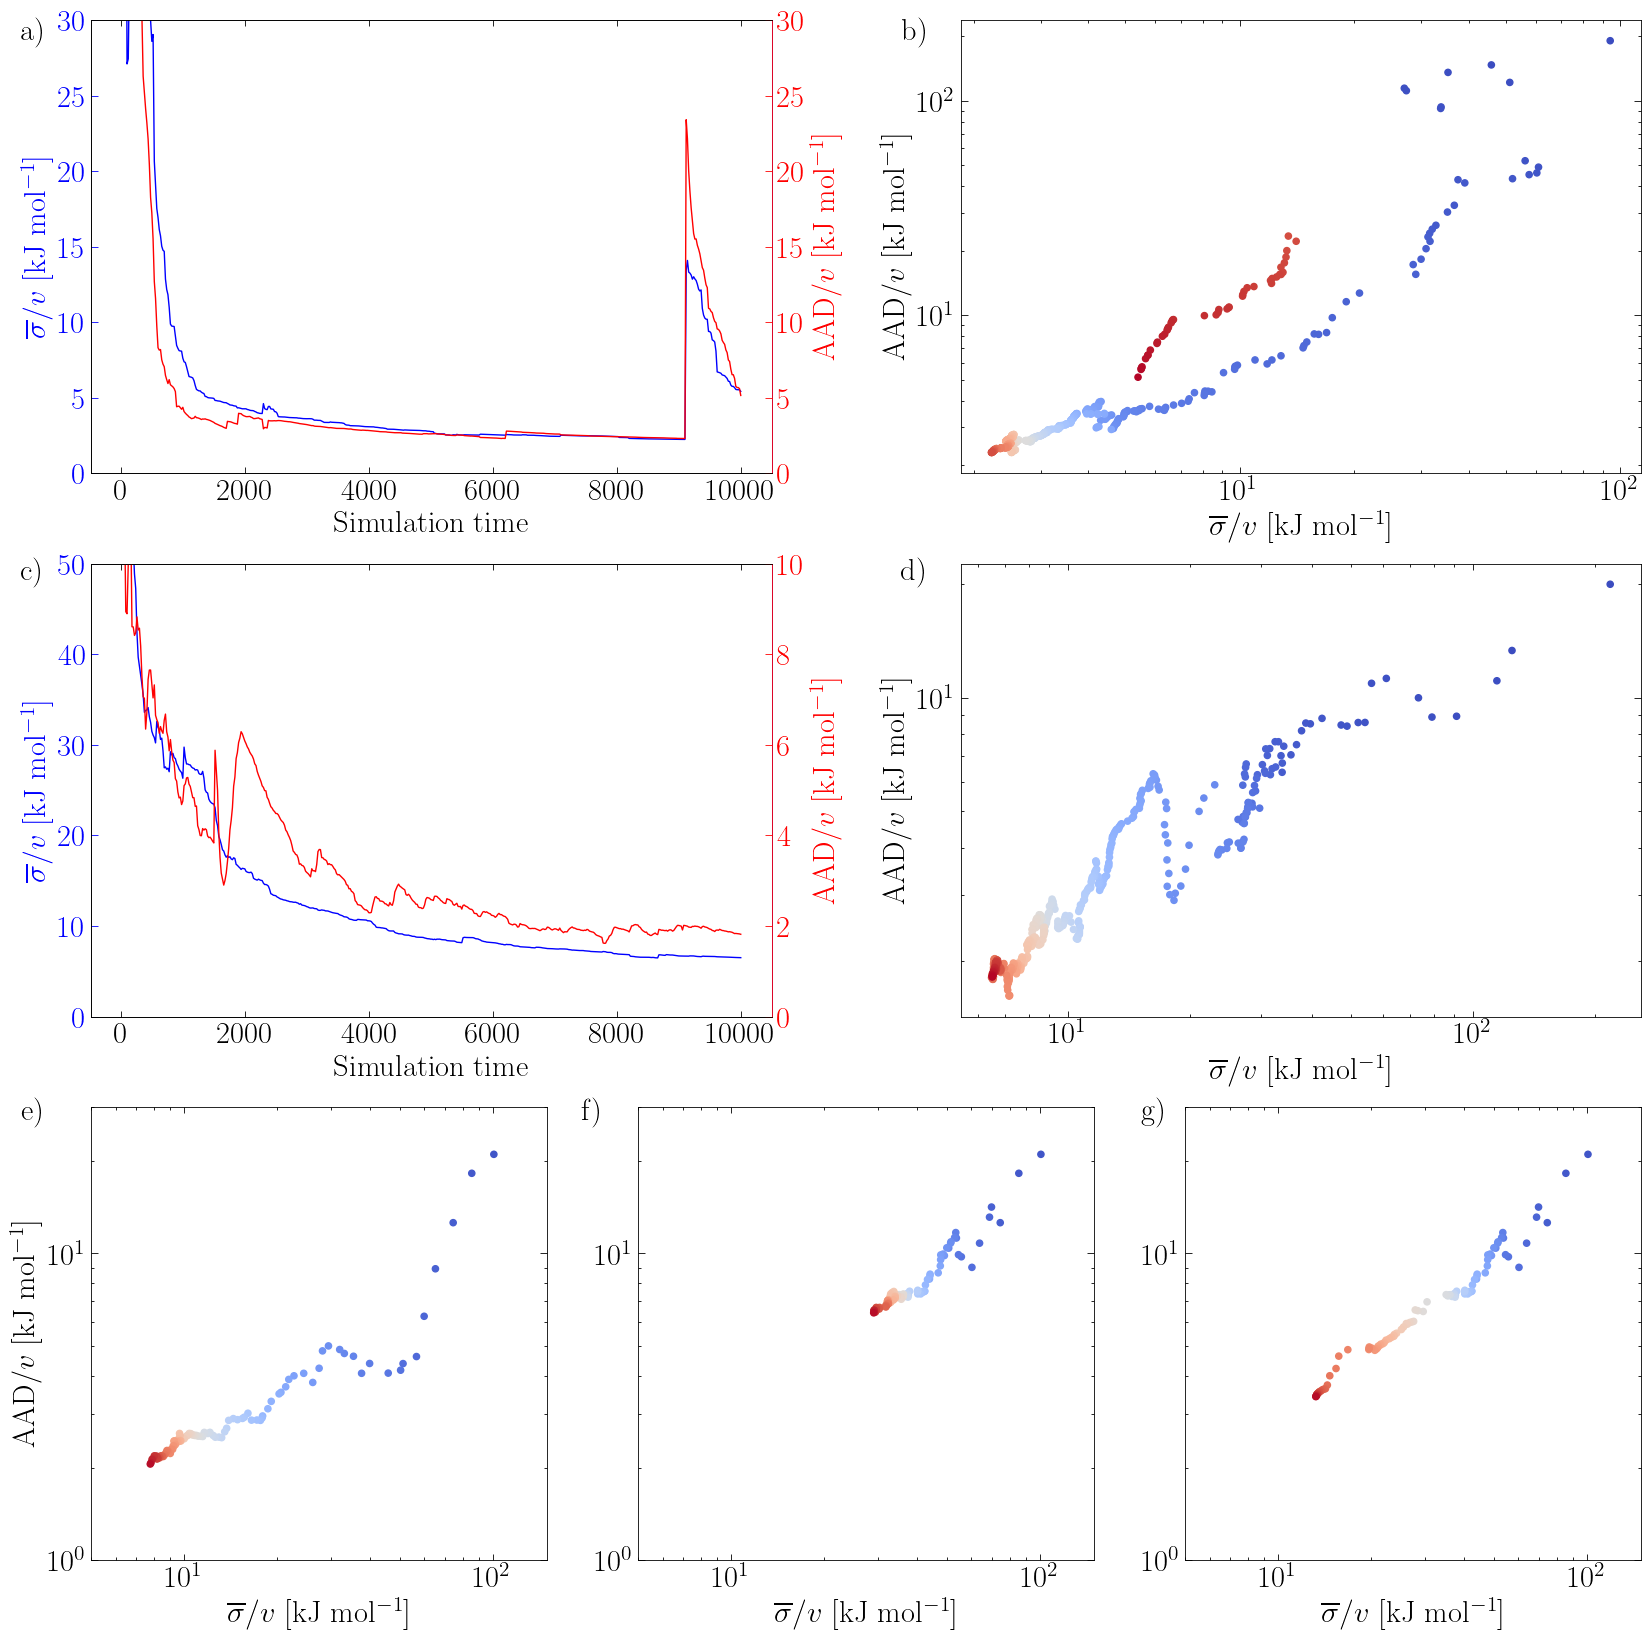

In [140]:
# plt.rcParams['xtick.minor.visible'] = True
# plt.rcParams['ytick.minor.visible'] = True

fig = plt.figure(figsize=(20,20))
gs = gridspec.GridSpec(3, 100, height_ratios=[1, 1, 1])


ax1 = fig.add_subplot(gs[0, :44])
ax2 = ax1.twinx()
ax3 = fig.add_subplot(gs[0, 56:])  
ax4 = fig.add_subplot(gs[1, :44]) 
ax5 = ax4.twinx() 
ax6 = fig.add_subplot(gs[1, 56:])  

gs = gridspec.GridSpec(3, 3, height_ratios=[1, 1, 1])

ax7 = fig.add_subplot(gs[2, 0]) 
ax8 = fig.add_subplot(gs[2, 1], sharex=ax7, sharey=ax7)  
ax9 = fig.add_subplot(gs[2, 2], sharex=ax7, sharey=ax7) 
##############################################################################################################
##############################################################################################################


ax1.plot( time_history_1, np.asarray(ofe_history_1) / np.asarray(volume_history_1) ,color='blue',linewidth=1)
ax2.plot( time_history_1, np.asarray(aad_history_1) / np.asarray(volume_history_1) ,color='red',linewidth=1)
ax1.set_xlabel("Simulation time"); ax1.set_ylabel("$\overline{\sigma}/v$ [kJ mol$^{-1}$]", c="blue"); ax2.set_ylabel("AAD/$v$ [kJ mol$^{-1}$]", c="red")#ax1.set_title("error/volume vs time"); 
ax1.set_ylim(0,30)
ax2.set_ylim(0,30)
# handles1, labels1 = ax1.get_legend_handles_labels() ; handles2, labels2 = ax2.get_legend_handles_labels(); ax1.legend(handles1 + handles2, labels1 + labels2, fontsize=14)
# plt.show()
ax1.tick_params(axis='y', which='both', colors='blue')
ax1.spines['right'].set_color('blue')        # setting up Y-axis tick color to red
ax2.tick_params(axis='y', which='both', colors='red')
ax2.spines['right'].set_color('red')        # setting up Y-axis tick color to red

##############################################################################################################
from scipy import stats
slope, intercept, r, p, se = stats.linregress(np.asarray(ofe_history_1) / np.asarray(volume_history_1), np.asarray(aad_history_1) / np.asarray(volume_history_1))
x_line = np.linspace(min(np.asarray(ofe_history_1) / np.asarray(volume_history_1)), max(np.asarray(ofe_history_1) / np.asarray(volume_history_1)), 200)

cmap = plt.cm.get_cmap('coolwarm')
norm = plt.Normalize(0, len(ofe_history_1))
# plt.figure(figsize=(15,5))

# plt.subplot(1,3,3)
# ax3.plot(x_line, x_line*slope + intercept, c="grey", alpha=0.3, label="LR: y=" + str(round(slope,2)) + "x+" + str(round(intercept,2)) + " with R$^2$=" + str(round(r**2,2)), linestyle='dashed')

ax3.scatter(np.asarray(ofe_history_1) / np.asarray(volume_history_1), np.asarray(aad_history_1) / np.asarray(volume_history_1) ,s=20, c=range(len(ofe_history_1)), cmap=cmap, norm=norm)
# ax3.plot(np.asarray(ofe_history_1) / np.asarray(volume_history_1), np.asarray(aad_history_1) / np.asarray(volume_history_1) , c="grey", alpha=0.3, label="error evolution"); 
ax3.set_xlabel("$\overline{\sigma}/v$ [kJ mol$^{-1}$]"); ax3.set_ylabel("AAD/$v$ [kJ mol$^{-1}$]"); ax3.set_xscale("log"); ax3.set_yscale("log")#;ax3.set_title("aad/v vs. ofe/v"); 
# ax3.legend(fontsize=14)
# handles1, labels1 = ax1.get_legend_handles_labels() ; handles2, labels2 = ax2.get_legend_handles_labels(); ax1.legend(handles1 + handles2, labels1 + labels2, fontsize=14)


##############################################################################################################
##############################################################################################################


ax4.plot( time_history_2, np.asarray(ofe_history_2) / np.asarray(volume_history_2) ,color='blue',linewidth=1,label="Aofe")
ax5.plot( time_history_2, np.asarray(aad_history_2)[:,1] / np.asarray(volume_history_2) ,color='red',linewidth=1,label="AAD")
ax4.set_xlabel("Simulation time"); ax4.set_ylabel("$\overline{\sigma}/v$ [kJ mol$^{-1}$]", c="blue"); ax5.set_ylabel("AAD/$v$ [kJ mol$^{-1}$]", c="red")#ax1.set_title("error/volume vs time"); 
ax4.set_ylim(0,50)
ax5.set_ylim(0,10)
# handles1, labels1 = ax4.get_legend_handles_labels() ; handles2, labels2 = ax5.get_legend_handles_labels(); ax4.legend(handles1 + handles2, labels1 + labels2, fontsize=14)
# plt.show()
ax4.tick_params(axis='y', which='both', colors='blue')
ax4.spines['right'].set_color('blue')        # setting up Y-axis tick color to red
ax5.tick_params(axis='y', which='both', colors='red')
ax5.spines['right'].set_color('red')        # setting up Y-axis tick color to red

##############################################################################################################
slope, intercept, r, p, se = stats.linregress(np.asarray(ofe_history_2) / np.asarray(volume_history_2), np.asarray(aad_history_2)[:,1] / np.asarray(volume_history_2))
x_line = np.linspace(min(np.asarray(ofe_history_2) / np.asarray(volume_history_2)), max(np.asarray(ofe_history_2) / np.asarray(volume_history_2)), 200)

cmap = plt.cm.get_cmap('coolwarm')
norm = plt.Normalize(0, len(ofe_history_2))
# plt.figure(figsize=(15,5))

# plt.subplot(1,3,3)
# ax6.plot(x_line, x_line*slope + intercept, c="grey", alpha=0.3, label="LR: y=" + str(round(slope,2)) + "x+" + str(round(intercept,2)) + " with R$^2$=" + str(round(r**2,2)), linestyle='dashed')

ax6.scatter(np.asarray(ofe_history_2) / np.asarray(volume_history_2), np.asarray(aad_history_2)[:,1] / np.asarray(volume_history_2) ,s=20, c=range(len(ofe_history_2)), cmap=cmap, norm=norm)
# ax6.plot(np.asarray(ofe_history_2) / np.asarray(volume_history_2), np.asarray(aad_history_2)[:,1] / np.asarray(volume_history_2) , c="grey", alpha=0.3, label="error evolution"); 
ax6.set_xlabel("$\overline{\sigma}/v$ [kJ mol$^{-1}$]"); ax6.set_ylabel("AAD/$v$ [kJ mol$^{-1}$]"); ax6.set_xscale("log"); ax6.set_yscale("log")#;ax6.set_title("aad/v vs. ofe/v"); 
# ax6.legend(fontsize=14)
# handles1, labels1 = ax1.get_legend_handles_labels() ; handles2, labels2 = ax2.get_legend_handles_labels(); ax1.legend(handles1 + handles2, labels1 + labels2, fontsize=14)


##############################################################################################################
##############################################################################################################
norm = plt.Normalize(0, len(ofe_history_31))

ax7.scatter(np.asarray(ofe_history_31) / np.asarray(volume_history_31), np.asarray(aad_history_31)[:,1] / np.asarray(volume_history_31) ,s=20, c=range(len(ofe_history_31)), cmap=cmap, norm=norm)
# ax7.plot(np.asarray(ofe_history_31) / np.asarray(volume_history_31), np.asarray(aad_history_31)[:,1] / np.asarray(volume_history_31) , c="black", alpha=0.3, label="error evolution"); 
# ax7.plot(x_line_31, x_line_31*slope_31 + intercept_31, c="black", alpha=0.3, label="LR: y=" + str(round(slope_31,2)) + "x+" + str(round(intercept_31,2)) + " with R$^2$=" + str(round(r_31**2,2)), linestyle='dashed')
ax7.set_xlabel("$\overline{\sigma}/v$ [kJ mol$^{-1}$]"); 
ax7.set_ylabel("AAD/$v$ [kJ mol$^{-1}$]")#; plt.title("10 MetaD + 10 MetaD+US")
ax7.set_xscale("log"); ax7.set_yscale("log")
ax7.set_ylim(1, 30); ax7.set_xlim(5, 150)
# ax7.legend(fontsize=14); 

##############################################################################################################


ax8.scatter(np.asarray(ofe_history_32)  / np.asarray(volume_history_32), np.asarray(aad_history_32)[:,1]  / np.asarray(volume_history_32) ,s=20, c=range(len(ofe_history_32)), cmap=cmap, norm=norm)
# ax8.plot(np.asarray(ofe_history_32)  / np.asarray(volume_history_32), np.asarray(aad_history_32)[:,1]  / np.asarray(volume_history_32), c="red", alpha=0.3, label="error evolution");
# ax8.plot(x_line_32, x_line_32*slope_32 + intercept_32, c="red", alpha=0.3, label="LR: y=" + str(round(slope_32,2)) + "x+" + str(round(intercept_32,2)) + " with R$^2$=" + str(round(r_32**2,2)), linestyle='dashed')
ax8.set_xlabel("$\overline{\sigma}/v$ [kJ mol$^{-1}$]"); 
# ax8.set_ylabel("AAD/$v$ [kJ mol$^{-1}$]")#; plt.title("10 MetaD + 10 MetaD+US")
ax8.set_xscale("log"); ax8.set_yscale("log")
ax8.set_ylim(1, 30); ax8.set_xlim(5, 150)
# ax8.legend(fontsize=14); 

##############################################################################################################


ax9.scatter(np.asarray(ofe_history_33) / np.asarray(volume_history_33), np.asarray(aad_history_33)[:,1] / np.asarray(volume_history_33) ,s=20, c=range(len(ofe_history_33)), cmap=cmap, norm=norm)
# ax9.plot(np.asarray(ofe_history_33) / np.asarray(volume_history_33), np.asarray(aad_history_33)[:,1] / np.asarray(volume_history_33), c="blue", alpha=0.3, label="error evolution"); 
# ax9.plot(x_line_33, x_line_33*slope_33 + intercept_33, c="blue", alpha=0.3, label="LR: y=" + str(round(slope_33,2)) + "x+" + str(round(intercept_33,2)) + " with R$^2$=" + str(round(r_33**2,2)), linestyle='dashed')
ax9.set_xlabel("$\overline{\sigma}/v$ [kJ mol$^{-1}$]"); 
# ax9.set_ylabel("AAD/$v$ [kJ mol$^{-1}$]")#; plt.title("10 MetaD + 10 MetaD+US")
ax9.set_xscale("log"); ax9.set_yscale("log")
ax9.set_ylim(1, 30); ax9.set_xlim(5, 150)
# ax9.legend(fontsize=14); 
# plt.plot(x_line_31, x_line_31, c="lime")

# plt.xlabel("$\overline{\sigma}/v$ [kJ mol$^{-1}$]"); plt.ylabel("AAD/$v$ [kJ mol$^{-1}$]")#; plt.title("10 MetaD + 10 MetaD+US")
# plt.ylim(1,500); plt.xlim(1,500)
# plt.xscale("log"); plt.yscale("log")

h = [0.87, 0.6, 0.33]
w = [0.09, 0.53]
w2 = [w[0], 0.37, 0.65]

fig.text(x=w[0], y=h[0], s="a)"); fig.text(x=w[1], y=h[0], s="b)")
fig.text(x=w[0], y=h[1], s="c)"); fig.text(x=w[1], y=h[1], s="d)")
fig.text(x=w2[0], y=h[2], s="e)"); fig.text(x=w2[1], y=h[2], s="f)"); fig.text(x=w2[2], y=h[2], s="g)")


# fig.text(x=0.445, y=1, s="1D Analytical Potential")
# fig.text(x=0.46, y=0.67, s="Alanine Dipeptide")
# fig.text(x=0.46, y=0.32, s="Invernizzi Potential")

# plt.tight_layout(); 

plt.savefig(path_Figure_E + 'FigureE_1.png', dpi=600, bbox_inches='tight')

plt.show()
# plt.rcParams['xtick.minor.visible'] = False
# plt.rcParams['ytick.minor.visible'] = False

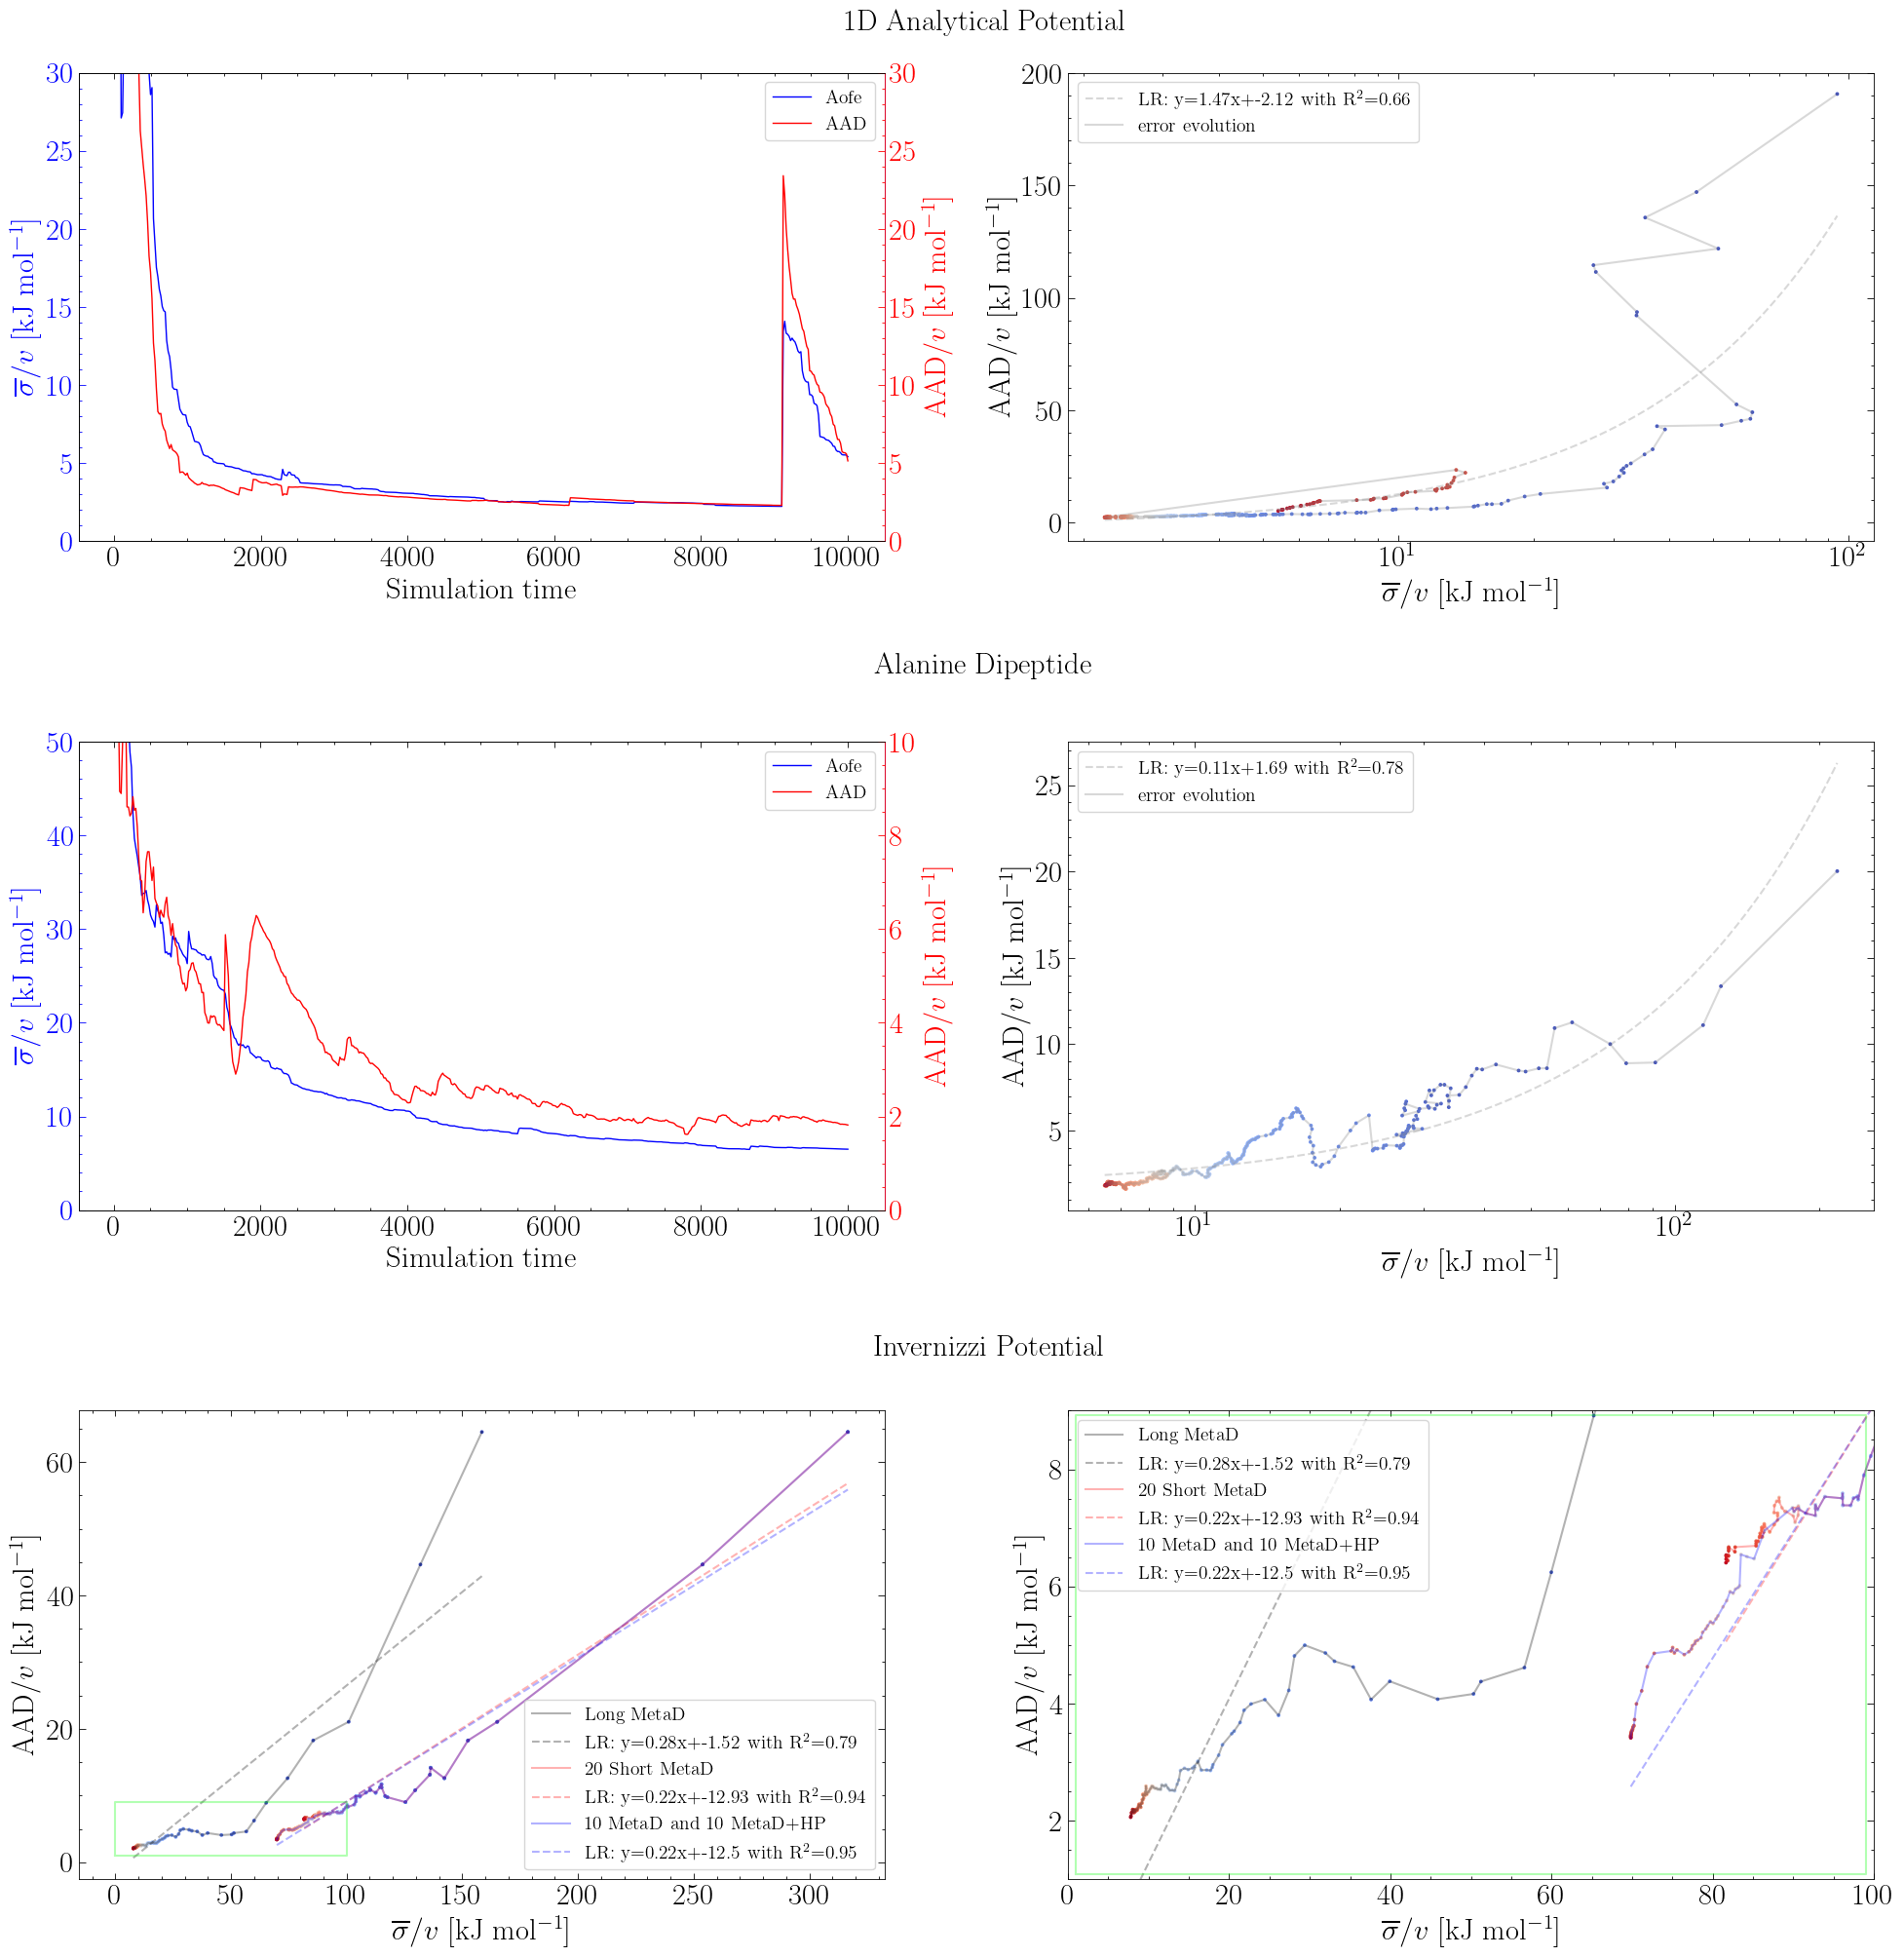

In [74]:
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True

fig = plt.figure(figsize=(20,20))
gs = gridspec.GridSpec(5, 6, height_ratios=[1, 0.0, 1, 0.0, 1])


ax1 = fig.add_subplot(gs[0, :3])
ax2 = ax1.twinx()
ax3 = fig.add_subplot(gs[0, 3:])  # First row, second and third column combined
ax4 = fig.add_subplot(gs[2, :3])  # Second row, first column
ax5 = ax4.twinx()  # Second y-axis for the fourth plot
ax6 = fig.add_subplot(gs[2, 3:])  # Second row, second and third column combined
ax7 = fig.add_subplot(gs[4, :3])  # Third row, first column
ax8 = fig.add_subplot(gs[4, 3:])  # Third row, second column
##############################################################################################################
##############################################################################################################


ax1.plot( time_history_1, np.asarray(ofe_history_1) / np.asarray(volume_history_1) ,color='blue',linewidth=1,label="Aofe")
ax2.plot( time_history_1, np.asarray(aad_history_1) / np.asarray(volume_history_1) ,color='red',linewidth=1,label="AAD")
ax1.set_xlabel("Simulation time"); ax1.set_ylabel("$\overline{\sigma}/v$ [kJ mol$^{-1}$]", c="blue"); ax2.set_ylabel("AAD/$v$ [kJ mol$^{-1}$]", c="red")#ax1.set_title("error/volume vs time"); 
ax1.set_ylim(0,30)
ax2.set_ylim(0,30)
handles1, labels1 = ax1.get_legend_handles_labels() ; handles2, labels2 = ax2.get_legend_handles_labels(); ax1.legend(handles1 + handles2, labels1 + labels2, fontsize=14)
# plt.show()
ax1.tick_params(axis='y', which='both', colors='blue')
ax1.spines['right'].set_color('blue')        # setting up Y-axis tick color to red
ax2.tick_params(axis='y', which='both', colors='red')
ax2.spines['right'].set_color('red')        # setting up Y-axis tick color to red

##############################################################################################################
from scipy import stats
slope, intercept, r, p, se = stats.linregress(np.asarray(ofe_history_1) / np.asarray(volume_history_1), np.asarray(aad_history_1) / np.asarray(volume_history_1))
x_line = np.linspace(min(np.asarray(ofe_history_1) / np.asarray(volume_history_1)), max(np.asarray(ofe_history_1) / np.asarray(volume_history_1)), 200)

cmap = plt.cm.get_cmap('coolwarm')
norm = plt.Normalize(0, len(ofe_history_1))
# plt.figure(figsize=(15,5))

# plt.subplot(1,3,3)
ax3.plot(x_line, x_line*slope + intercept, c="grey", alpha=0.3, label="LR: y=" + str(round(slope,2)) + "x+" + str(round(intercept,2)) + " with R$^2$=" + str(round(r**2,2)), linestyle='dashed')

ax3.scatter(np.asarray(ofe_history_1) / np.asarray(volume_history_1), np.asarray(aad_history_1) / np.asarray(volume_history_1) ,s=3, c=range(len(ofe_history_1)), cmap=cmap, norm=norm)
ax3.plot(np.asarray(ofe_history_1) / np.asarray(volume_history_1), np.asarray(aad_history_1) / np.asarray(volume_history_1) , c="grey", alpha=0.3, label="error evolution"); 
ax3.set_xlabel("$\overline{\sigma}/v$ [kJ mol$^{-1}$]"); ax3.set_ylabel("AAD/$v$ [kJ mol$^{-1}$]"); ax3.set_xscale("log")#; plt.yscale("log");ax3.set_title("aad/v vs. ofe/v"); 
ax3.legend(fontsize=14)
# handles1, labels1 = ax1.get_legend_handles_labels() ; handles2, labels2 = ax2.get_legend_handles_labels(); ax1.legend(handles1 + handles2, labels1 + labels2, fontsize=14)


##############################################################################################################
##############################################################################################################


ax4.plot( time_history_2, np.asarray(ofe_history_2) / np.asarray(volume_history_2) ,color='blue',linewidth=1,label="Aofe")
ax5.plot( time_history_2, np.asarray(aad_history_2)[:,1] / np.asarray(volume_history_2) ,color='red',linewidth=1,label="AAD")
ax4.set_xlabel("Simulation time"); ax4.set_ylabel("$\overline{\sigma}/v$ [kJ mol$^{-1}$]", c="blue"); ax5.set_ylabel("AAD/$v$ [kJ mol$^{-1}$]", c="red")#ax1.set_title("error/volume vs time"); 
ax4.set_ylim(0,50)
ax5.set_ylim(0,10)
handles1, labels1 = ax4.get_legend_handles_labels() ; handles2, labels2 = ax5.get_legend_handles_labels(); ax4.legend(handles1 + handles2, labels1 + labels2, fontsize=14)
# plt.show()
ax4.tick_params(axis='y', which='both', colors='blue')
ax4.spines['right'].set_color('blue')        # setting up Y-axis tick color to red
ax5.tick_params(axis='y', which='both', colors='red')
ax5.spines['right'].set_color('red')        # setting up Y-axis tick color to red

##############################################################################################################
slope, intercept, r, p, se = stats.linregress(np.asarray(ofe_history_2) / np.asarray(volume_history_2), np.asarray(aad_history_2)[:,1] / np.asarray(volume_history_2))
x_line = np.linspace(min(np.asarray(ofe_history_2) / np.asarray(volume_history_2)), max(np.asarray(ofe_history_2) / np.asarray(volume_history_2)), 200)

cmap = plt.cm.get_cmap('coolwarm')
norm = plt.Normalize(0, len(ofe_history_2))
# plt.figure(figsize=(15,5))

# plt.subplot(1,3,3)
ax6.plot(x_line, x_line*slope + intercept, c="grey", alpha=0.3, label="LR: y=" + str(round(slope,2)) + "x+" + str(round(intercept,2)) + " with R$^2$=" + str(round(r**2,2)), linestyle='dashed')

ax6.scatter(np.asarray(ofe_history_2) / np.asarray(volume_history_2), np.asarray(aad_history_2)[:,1] / np.asarray(volume_history_2) ,s=3, c=range(len(ofe_history_2)), cmap=cmap, norm=norm)
ax6.plot(np.asarray(ofe_history_2) / np.asarray(volume_history_2), np.asarray(aad_history_2)[:,1] / np.asarray(volume_history_2) , c="grey", alpha=0.3, label="error evolution"); 
ax6.set_xlabel("$\overline{\sigma}/v$ [kJ mol$^{-1}$]"); ax6.set_ylabel("AAD/$v$ [kJ mol$^{-1}$]"); ax6.set_xscale("log")#; plt.yscale("log");ax6.set_title("aad/v vs. ofe/v"); 
ax6.legend(fontsize=14)
# handles1, labels1 = ax1.get_legend_handles_labels() ; handles2, labels2 = ax2.get_legend_handles_labels(); ax1.legend(handles1 + handles2, labels1 + labels2, fontsize=14)


##############################################################################################################
##############################################################################################################
norm = plt.Normalize(0, len(ofe_history_31))

ax7.scatter(np.asarray(ofe_history_31) / np.asarray(volume_history_31), np.asarray(aad_history_31)[:,1] / np.asarray(volume_history_31) ,s=3, c=range(len(ofe_history_31)), cmap=cmap, norm=norm)
ax7.plot(np.asarray(ofe_history_31) / np.asarray(volume_history_31), np.asarray(aad_history_31)[:,1] / np.asarray(volume_history_31) , c="black", alpha=0.3, label="Long MetaD"); 
ax7.plot(x_line_31, x_line_31*slope_31 + intercept_31, c="black", alpha=0.3, label="LR: y=" + str(round(slope_31,2)) + "x+" + str(round(intercept_31,2)) + " with R$^2$=" + str(round(r_31**2,2)), linestyle='dashed')
ax7.set_xlabel("$\overline{\sigma}/v$ [kJ mol$^{-1}$]"); 
ax7.set_ylabel("AAD/$v$ [kJ mol$^{-1}$]")#; plt.title("10 MetaD + 10 MetaD+US")

ax7.scatter(np.asarray(ofe_history_32)  / np.asarray(volume_history_32), np.asarray(aad_history_32)[:,1]  / np.asarray(volume_history_32) ,s=3, c=range(len(ofe_history_32)), cmap=cmap, norm=norm)
ax7.plot(np.asarray(ofe_history_32)  / np.asarray(volume_history_32), np.asarray(aad_history_32)[:,1]  / np.asarray(volume_history_32), c="red", alpha=0.3, label="20 Short MetaD");
ax7.plot(x_line_32, x_line_32*slope_32 + intercept_32, c="red", alpha=0.3, label="LR: y=" + str(round(slope_32,2)) + "x+" + str(round(intercept_32,2)) + " with R$^2$=" + str(round(r_32**2,2)), linestyle='dashed')
ax7.set_xlabel("$\overline{\sigma}/v$ [kJ mol$^{-1}$]"); 
ax7.set_ylabel("AAD/$v$ [kJ mol$^{-1}$]")#; plt.title("10 MetaD + 10 MetaD+US")

ax7.scatter(np.asarray(ofe_history_33) / np.asarray(volume_history_33), np.asarray(aad_history_33)[:,1] / np.asarray(volume_history_33) ,s=3, c=range(len(ofe_history_33)), cmap=cmap, norm=norm)
ax7.plot(np.asarray(ofe_history_33) / np.asarray(volume_history_33), np.asarray(aad_history_33)[:,1] / np.asarray(volume_history_33), c="blue", alpha=0.3, label="10 MetaD and 10 MetaD+HP"); 
ax7.plot(x_line_33, x_line_33*slope_33 + intercept_33, c="blue", alpha=0.3, label="LR: y=" + str(round(slope_33,2)) + "x+" + str(round(intercept_33,2)) + " with R$^2$=" + str(round(r_33**2,2)), linestyle='dashed')
ax7.set_xlabel("$\overline{\sigma}/v$ [kJ mol$^{-1}$]"); 
ax7.set_ylabel("AAD/$v$ [kJ mol$^{-1}$]")#; plt.title("10 MetaD + 10 MetaD+US")
ax7.legend(fontsize=14); 
# ax7.set_xscale("log")

ax7.plot([0, 100, 100, 0, 0], [1,1,9,9,1], color="lime", alpha=0.3)

##############################################################################################################

ax8.scatter(np.asarray(ofe_history_31) / np.asarray(volume_history_31), np.asarray(aad_history_31)[:,1] / np.asarray(volume_history_31) ,s=3, c=range(len(ofe_history_31)), cmap=cmap, norm=norm)
ax8.plot(np.asarray(ofe_history_31) / np.asarray(volume_history_31), np.asarray(aad_history_31)[:,1] / np.asarray(volume_history_31) , c="black", alpha=0.3, label="Long MetaD"); 
ax8.plot(x_line_31, x_line_31*slope_31 + intercept_31, c="black", alpha=0.3, label="LR: y=" + str(round(slope_31,2)) + "x+" + str(round(intercept_31,2)) + " with R$^2$=" + str(round(r_31**2,2)), linestyle='dashed')
ax8.set_xlabel("$\overline{\sigma}/v$ [kJ mol$^{-1}$]"); 
ax8.set_ylabel("AAD/$v$ [kJ mol$^{-1}$]")#; plt.title("10 MetaD + 10 MetaD+US")

ax8.scatter(np.asarray(ofe_history_32)  / np.asarray(volume_history_32), np.asarray(aad_history_32)[:,1]  / np.asarray(volume_history_32) ,s=3, c=range(len(ofe_history_32)), cmap=cmap, norm=norm)
ax8.plot(np.asarray(ofe_history_32)  / np.asarray(volume_history_32), np.asarray(aad_history_32)[:,1]  / np.asarray(volume_history_32), c="red", alpha=0.3, label="20 Short MetaD");
ax8.plot(x_line_32, x_line_32*slope_32 + intercept_32, c="red", alpha=0.3, label="LR: y=" + str(round(slope_32,2)) + "x+" + str(round(intercept_32,2)) + " with R$^2$=" + str(round(r_32**2,2)), linestyle='dashed')
ax8.set_xlabel("$\overline{\sigma}/v$ [kJ mol$^{-1}$]"); 
ax8.set_ylabel("AAD/$v$ [kJ mol$^{-1}$]")#; plt.title("10 MetaD + 10 MetaD+US")

ax8.scatter(np.asarray(ofe_history_33) / np.asarray(volume_history_33), np.asarray(aad_history_33)[:,1] / np.asarray(volume_history_33) ,s=3, c=range(len(ofe_history_33)), cmap=cmap, norm=norm)
ax8.plot(np.asarray(ofe_history_33) / np.asarray(volume_history_33), np.asarray(aad_history_33)[:,1] / np.asarray(volume_history_33), c="blue", alpha=0.3, label="10 MetaD and 10 MetaD+HP"); 
ax8.plot(x_line_33, x_line_33*slope_33 + intercept_33, c="blue", alpha=0.3, label="LR: y=" + str(round(slope_33,2)) + "x+" + str(round(intercept_33,2)) + " with R$^2$=" + str(round(r_33**2,2)), linestyle='dashed')
ax8.set_xlabel("$\overline{\sigma}/v$ [kJ mol$^{-1}$]"); 
ax8.set_ylabel("AAD/$v$ [kJ mol$^{-1}$]")#; plt.title("10 MetaD + 10 MetaD+US")
ax8.legend(fontsize=14);
ax8.set_xlim(0.0, 100)
ax8.set_ylim(1, 9)
ax8.plot([1, 99, 99, 1, 1], [1.08,1.08,8.92,8.92,1.08], color="lime", alpha=0.3)


# plt.plot(x_line_31, x_line_31, c="lime")

# plt.xlabel("$\overline{\sigma}/v$ [kJ mol$^{-1}$]"); plt.ylabel("AAD/$v$ [kJ mol$^{-1}$]")#; plt.title("10 MetaD + 10 MetaD+US")
# plt.ylim(1,500); plt.xlim(1,500)
# plt.xscale("log"); plt.yscale("log")

fig.text(x=0.445, y=1, s="1D Analytical Potential")
fig.text(x=0.46, y=0.67, s="Alanine Dipeptide")
fig.text(x=0.46, y=0.32, s="Invernizzi Potential")

plt.tight_layout(); 

plt.savefig(path_Figure_E + 'FigureE_2.png', dpi=600, bbox_inches='tight')

plt.show()
plt.rcParams['xtick.minor.visible'] = False
plt.rcParams['ytick.minor.visible'] = False

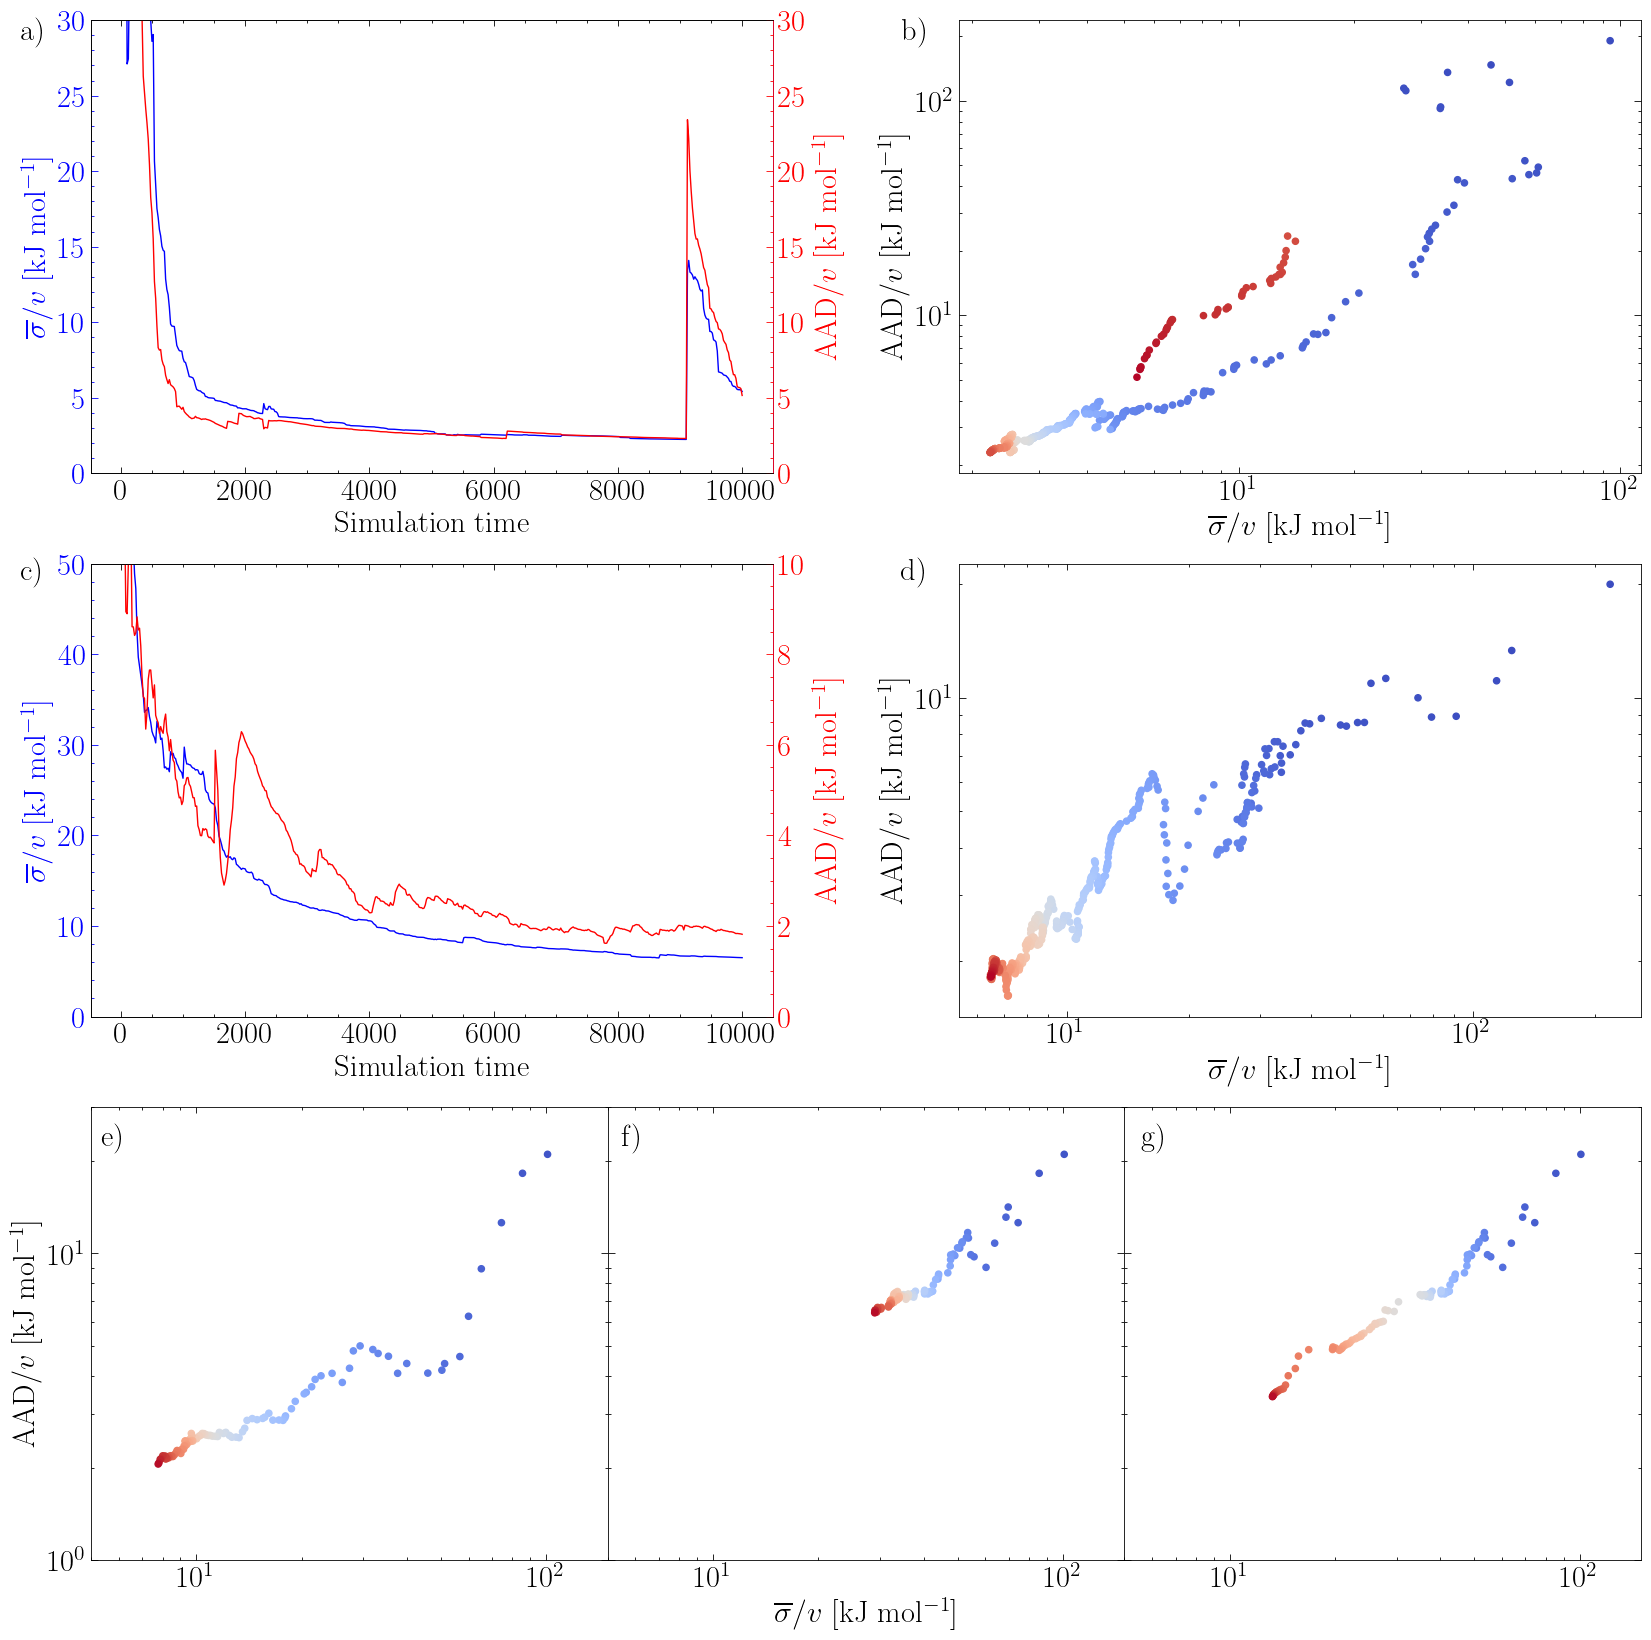

In [29]:
fig = plt.figure(figsize=(20,20))
gs = gridspec.GridSpec(3, 100, height_ratios=[1, 1, 1])

ax1 = fig.add_subplot(gs[0, :44])
ax2 = ax1.twinx()
ax3 = fig.add_subplot(gs[0, 56:])  
ax4 = fig.add_subplot(gs[1, :44]) 
ax5 = ax4.twinx() 
ax6 = fig.add_subplot(gs[1, 56:])  

gs = gridspec.GridSpec(3, 3, height_ratios=[1, 1, 1])

ax7 = fig.add_subplot(gs[2, 0]) 
ax8 = fig.add_subplot(gs[2, 1], sharex=ax7, sharey=ax7)  
ax9 = fig.add_subplot(gs[2, 2], sharex=ax8, sharey=ax8) 
##############################################################################################################
##############################################################################################################


ax1.plot( time_history_1, np.asarray(ofe_history_1) / np.asarray(volume_history_1) ,color='blue',linewidth=1)
ax2.plot( time_history_1, np.asarray(aad_history_1) / np.asarray(volume_history_1) ,color='red',linewidth=1)
ax1.set_xlabel("Simulation time"); ax1.set_ylabel("$\overline{\sigma}/v$ [kJ mol$^{-1}$]", c="blue"); ax2.set_ylabel("AAD/$v$ [kJ mol$^{-1}$]", c="red")#ax1.set_title("error/volume vs time"); 
ax1.set_ylim(0,30)
ax2.set_ylim(0,30)
# ax1.set_xlim(-750, 10200)
ax1.tick_params(axis='y', which='both', colors='blue'); ax1.spines['right'].set_color('blue')      
ax2.tick_params(axis='y', which='both', colors='red'); ax2.spines['right'].set_color('red')     

##############################################################################################################

cmap = plt.cm.get_cmap('coolwarm')
norm = plt.Normalize(0, len(ofe_history_1))

ax3.scatter(np.asarray(ofe_history_1) / np.asarray(volume_history_1), np.asarray(aad_history_1) / np.asarray(volume_history_1) ,s=20, c=range(len(ofe_history_1)), cmap=cmap, norm=norm)
ax3.set_xlabel("$\overline{\sigma}/v$ [kJ mol$^{-1}$]"); ax3.set_ylabel("AAD/$v$ [kJ mol$^{-1}$]"); ax3.set_xscale("log"); ax3.set_yscale("log")


##############################################################################################################
##############################################################################################################


ax4.plot( time_history_2, np.asarray(ofe_history_2) / np.asarray(volume_history_2) ,color='blue',linewidth=1,label="Aofe")
ax5.plot( time_history_2, np.asarray(aad_history_2)[:,1] / np.asarray(volume_history_2) ,color='red',linewidth=1,label="AAD")
ax4.set_xlabel("Simulation time"); ax4.set_ylabel("$\overline{\sigma}/v$ [kJ mol$^{-1}$]", c="blue"); ax5.set_ylabel("AAD/$v$ [kJ mol$^{-1}$]", c="red")
ax4.set_ylim(0,50)
ax5.set_ylim(0,10)
# ax4.set_xlim(-750, 10200)
ax4.tick_params(axis='y', which='both', colors='blue'); ax4.spines['right'].set_color('blue')        
ax5.tick_params(axis='y', which='both', colors='red'); ax5.spines['right'].set_color('red')      

##############################################################################################################

cmap = plt.cm.get_cmap('coolwarm')
norm = plt.Normalize(0, len(ofe_history_2))

ax6.scatter(np.asarray(ofe_history_2) / np.asarray(volume_history_2), np.asarray(aad_history_2)[:,1] / np.asarray(volume_history_2) ,s=20, c=range(len(ofe_history_2)), cmap=cmap, norm=norm)
ax6.set_xlabel("$\overline{\sigma}/v$ [kJ mol$^{-1}$]"); ax6.set_ylabel("AAD/$v$ [kJ mol$^{-1}$]"); ax6.set_xscale("log"); ax6.set_yscale("log")#;ax6.set_title("aad/v vs. ofe/v"); 


##############################################################################################################
##############################################################################################################
norm = plt.Normalize(0, len(ofe_history_31))

ax7.scatter(np.asarray(ofe_history_31) / np.asarray(volume_history_31), np.asarray(aad_history_31)[:,1] / np.asarray(volume_history_31) ,s=20, c=range(len(ofe_history_31)), cmap=cmap, norm=norm)
# ax7.set_xlabel("$\overline{\sigma}/v$ [kJ mol$^{-1}$]"); 
ax7.set_ylabel("AAD/$v$ [kJ mol$^{-1}$]")
ax7.set_xscale("log"); ax7.set_yscale("log")
ax7.set_ylim(1, 30); ax7.set_xlim(5, 150)

##############################################################################################################


ax8.scatter(np.asarray(ofe_history_32)  / np.asarray(volume_history_32), np.asarray(aad_history_32)[:,1]  / np.asarray(volume_history_32) ,s=20, c=range(len(ofe_history_32)), cmap=cmap, norm=norm)
ax8.set_xlabel("$\overline{\sigma}/v$ [kJ mol$^{-1}$]"); 
# ax8.set_ylabel("AAD/$v$ [kJ mol$^{-1}$]")
ax8.set_xscale("log"); ax8.set_yscale("log")
ax8.set_ylim(1, 30); ax8.set_xlim(5, 150)
plt.setp(ax8.get_yticklabels(), visible=False)

##############################################################################################################


ax9.scatter(np.asarray(ofe_history_33) / np.asarray(volume_history_33), np.asarray(aad_history_33)[:,1] / np.asarray(volume_history_33) ,s=20, c=range(len(ofe_history_33)), cmap=cmap, norm=norm)
# ax9.set_xlabel("$\overline{\sigma}/v$ [kJ mol$^{-1}$]"); 
# ax9.set_ylabel("AAD/$v$ [kJ mol$^{-1}$]")
ax9.set_xscale("log"); ax9.set_yscale("log")
ax9.set_ylim(1, 30); ax9.set_xlim(5, 150)
plt.setp(ax9.get_yticklabels(), visible=False)


##############################################################################################################
##############################################################################################################

h = [0.87, 0.6, 0.317]
w = [0.09, 0.53]
w2 = [0.13, 0.39, 0.65]

fig.text(x=w[0], y=h[0], s="a)"); fig.text(x=w[1], y=h[0], s="b)")
fig.text(x=w[0], y=h[1], s="c)"); fig.text(x=w[1], y=h[1], s="d)")
fig.text(x=w2[0], y=h[2], s="e)"); fig.text(x=w2[1], y=h[2], s="f)"); fig.text(x=w2[2], y=h[2], s="g)")

plt.subplots_adjust(wspace=0)

plt.savefig(path_Figure_E + 'FigureE_2.png', dpi=600, bbox_inches='tight')

plt.show()

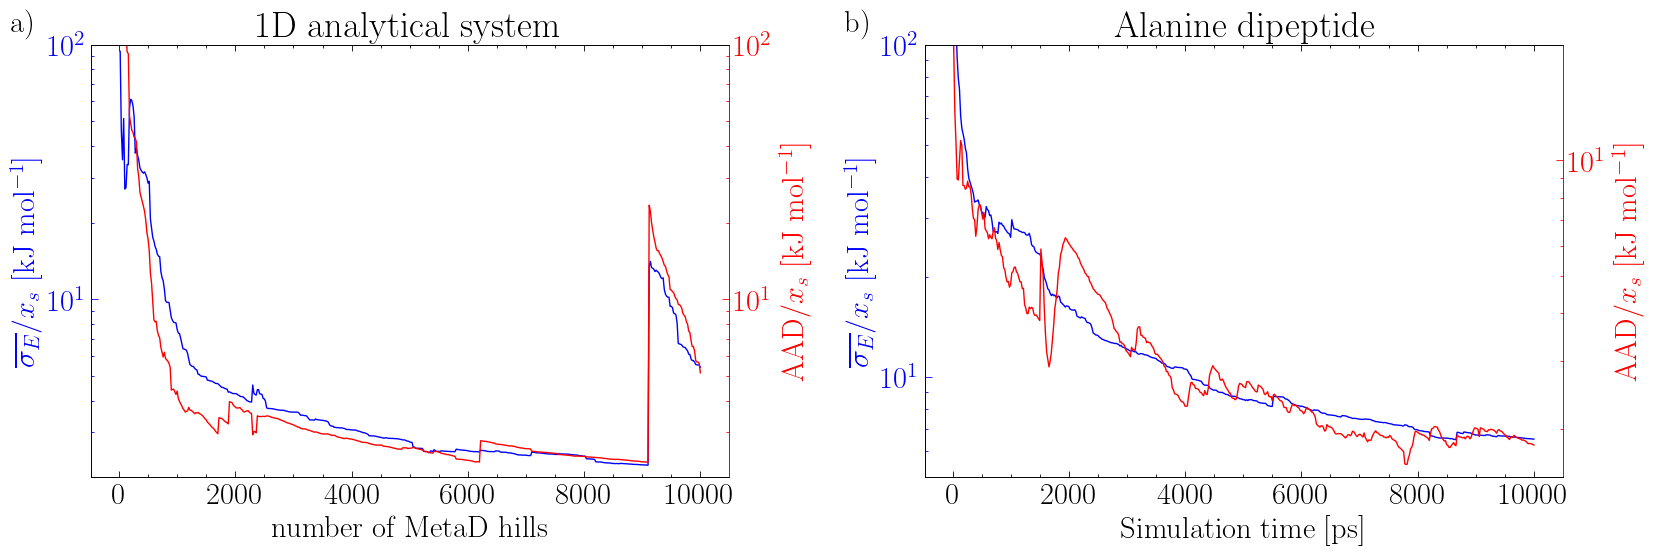

In [13]:
fig = plt.figure(figsize=(17,6))


gs = gridspec.GridSpec(3, 100, height_ratios=[1, 1, 1])

ax1 = fig.add_subplot(1,2,1)
ax2 = ax1.twinx()

ax4 = fig.add_subplot(1,2,2) 
ax5 = ax4.twinx() 



ax1.plot( time_history_1, np.asarray(ofe_history_1) / np.asarray(volume_history_1) ,color='blue',linewidth=1)
ax2.plot( time_history_1, np.asarray(aad_history_1) / np.asarray(volume_history_1) ,color='red',linewidth=1)
ax1.set_xlabel("number of MetaD hills"); ax1.set_ylabel("$\overline{\sigma_E}/x_s$ [kJ mol$^{-1}$]", c="blue"); ax2.set_ylabel("AAD/$x_s$ [kJ mol$^{-1}$]", c="red")#ax1.set_title("error/volume vs time"); 
ax1.set_ylim(0,30)
ax2.set_ylim(0,30)
# ax1.set_xlim(-750, 10200)
ax1.tick_params(axis='y', which='both', colors='blue'); ax1.spines['right'].set_color('blue')      
ax2.tick_params(axis='y', which='both', colors='red'); ax2.spines['right'].set_color('red')    
ax1.set_title("1D analytical system")
ax1.set_yscale("log")
ax1.set_ylim(2,100)
ax2.set_yscale("log")
ax2.set_ylim(2,100)
 

##############################################################################################################

ax4.plot( time_history_2, np.asarray(ofe_history_2) / np.asarray(volume_history_2) ,color='blue',linewidth=1,label="Aofe")
ax5.plot( time_history_2, np.asarray(aad_history_2)[:,1] / np.asarray(volume_history_2) ,color='red',linewidth=1,label="AAD")
ax4.set_xlabel("Simulation time [ps]"); ax4.set_ylabel("$\overline{\sigma_E}/x_s$ [kJ mol$^{-1}$]", c="blue"); ax5.set_ylabel("AAD/$x_s$ [kJ mol$^{-1}$]", c="red")
ax4.set_ylim(0,50)
ax5.set_ylim(0,10)
# ax4.set_xlim(-750, 10200)
ax4.tick_params(axis='y', which='both', colors='blue'); ax4.spines['right'].set_color('blue')        
ax5.tick_params(axis='y', which='both', colors='red'); ax5.spines['right'].set_color('red')      
ax4.set_title("Alanine dipeptide")
ax4.set_yscale("log")
ax4.set_ylim(5,100)
ax5.set_yscale("log")
ax5.set_ylim(1.5,20)

h = [0.91]
w = [0.02, 0.51]
fig.text(x=w[0], y=h[0], s="a)")
fig.text(x=w[1], y=h[0], s="b)")


plt.tight_layout()
plt.savefig(path_Figure_E + 'FigureE_small.png', dpi=600, bbox_inches='tight')
plt.show()